
# Analisis Exploratorio de Datos

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler



## Carga de Datos de Ejemplo

In [6]:
# Carga el dataset de California Housing
desc = fetch_california_housing()
X,Y = fetch_california_housing(return_X_y = True)
data = pd.DataFrame(X, columns =desc['feature_names'] )
data[desc['target_names'][0]] = Y 

In [7]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## EDA y Calidad de Datos

In [9]:
# Info y estadísticas descriptivas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Detección de Outliers: IQR, Z-Score y Envoltura Elíptica

In [14]:
# Método IQR en una variable (ej. 'bmi')
col = 'MedInc'
Q1, Q3 = data[col].quantile(0.25), data[col].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
iqr_outliers = ((data[col] < lower) | (data[col] > upper)).sum()
print(f"Outliers por IQR en '{col}':", iqr_outliers)

# Z-score simple
z = (data[col] - data[col].mean()) / data[col].std()
z_outliers = (np.abs(z) > 3).sum()
print(f"Outliers por Z-score (>|3|) en '{col}':", z_outliers)


Outliers por IQR en 'MedInc': 681
Outliers por Z-score (>|3|) en 'MedInc': 345


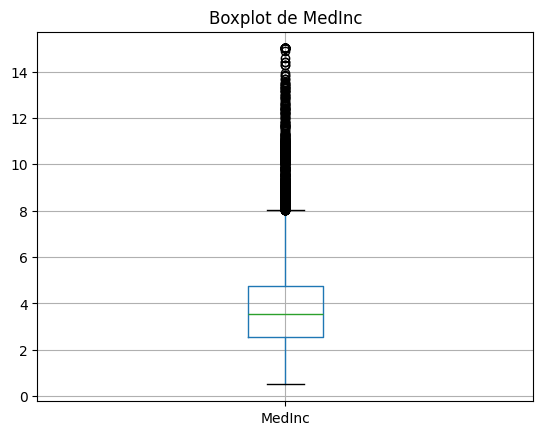

In [16]:
### Boxplots y histogramas
data.boxplot(column=col)
plt.title(f'Boxplot de {col}')
plt.show()

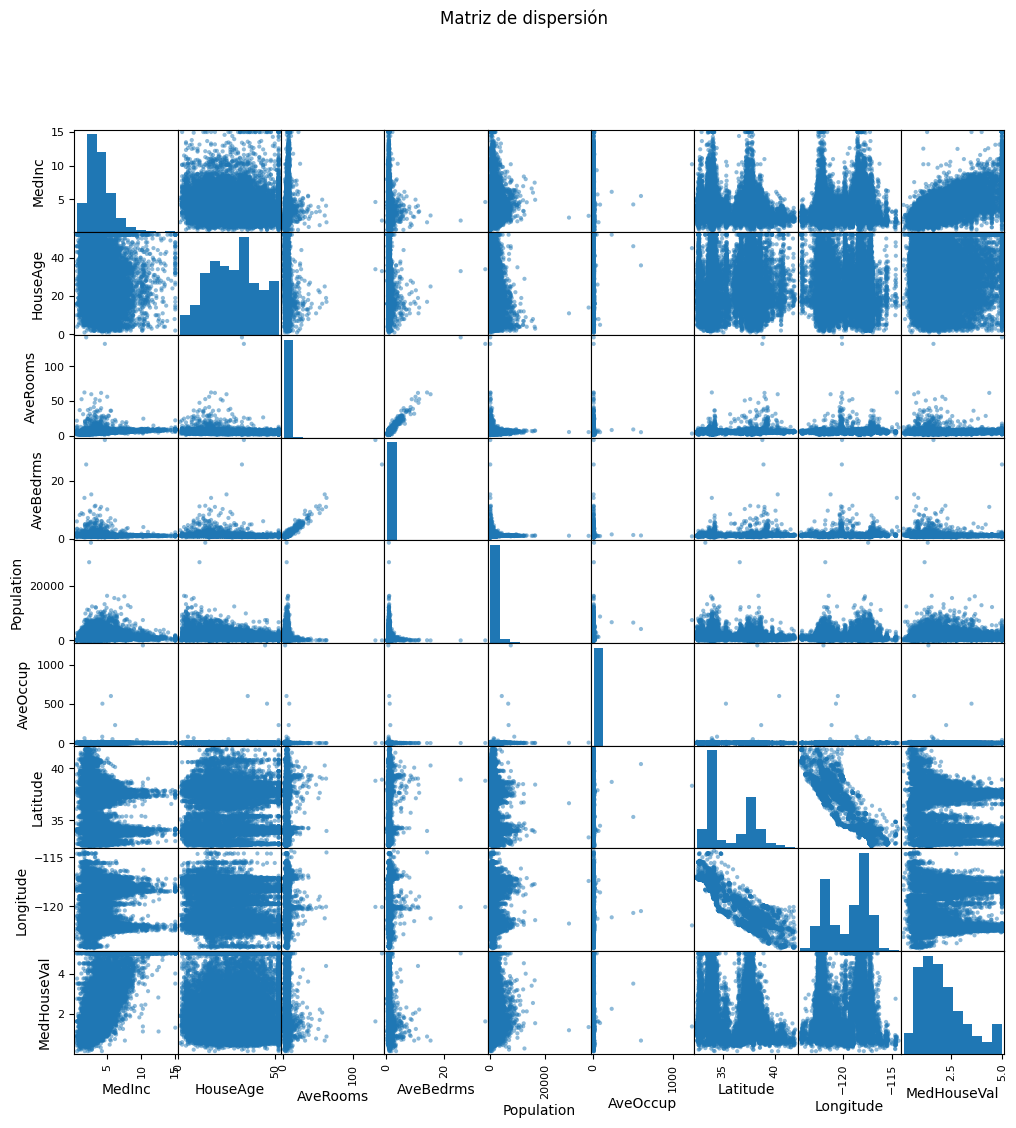

In [22]:
### correlaciones y distribuciones
pd.plotting.scatter_matrix(data, figsize=(12, 12))
plt.suptitle('Matriz de dispersión')
plt.show()

In [23]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


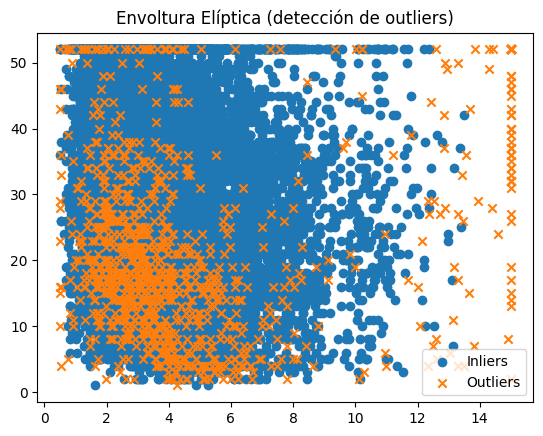

In [19]:
# Envoltura Elíptica (Elliptic Envelope)
X_all = data[data.columns[:-3]].values  # Excluye la columna objetivo y longitude/latitude
ee = EllipticEnvelope(contamination=0.05, random_state=42).fit(X_all)
y_pred = ee.predict(X_all)  # 1 inlier, -1 outlier

plt.figure()
plt.scatter(X_all[y_pred==1, 0], X_all[y_pred==1, 1], label="Inliers")
plt.scatter(X_all[y_pred==-1, 0], X_all[y_pred==-1, 1], marker="x", label="Outliers")
plt.title("Envoltura Elíptica (detección de outliers)")
plt.legend()
plt.show()

## Particionamiento Train / Valid / Test

In [24]:
X_reg = data[data.columns[:-1]]
y_reg = data[desc['target_names'][0]]

# División: 60% train, 20% valid, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X_reg, y_reg, test_size=0.4, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) 

print("Tamaños -> Train:", X_train.shape, "Valid:", X_valid.shape, "Test:", X_test.shape)


Tamaños -> Train: (12384, 8) Valid: (4128, 8) Test: (4128, 8)


## Estandarización vs Min–Max Scaling

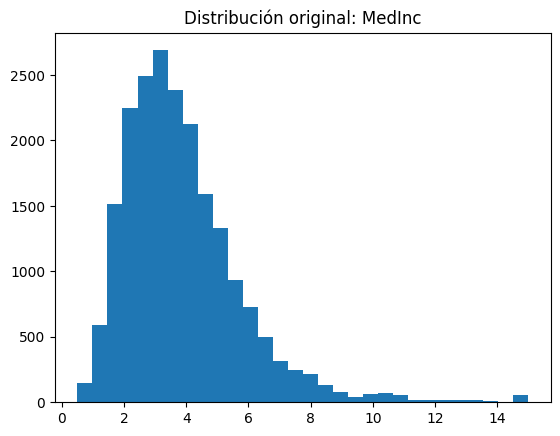

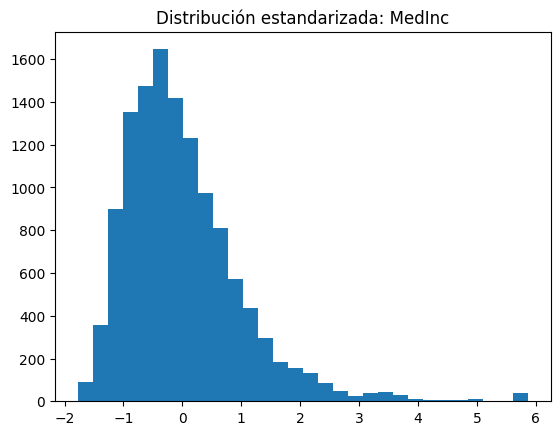

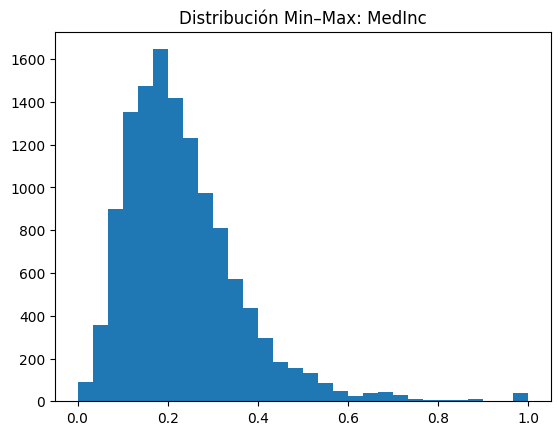

In [25]:
sc_std = StandardScaler()
sc_mm = MinMaxScaler()

X_std = sc_std.fit_transform(X_train)
X_mm = sc_mm.fit_transform(X_train)

# Visualizar distribución de una feature antes/después
feature = 'MedInc'
plt.figure()
plt.hist(X_reg[feature].values, bins=30)
plt.title(f"Distribución original: {feature}")
plt.show()

plt.figure()
plt.hist(X_std[:, X_reg.columns.get_loc(feature)], bins=30)
plt.title(f"Distribución estandarizada: {feature}")
plt.show()

plt.figure()
plt.hist(X_mm[:, X_reg.columns.get_loc(feature)], bins=30)
plt.title(f"Distribución Min–Max: {feature}")
plt.show()
